<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Evolution-of-Basketball" data-toc-modified-id="Evolution-of-Basketball-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Evolution of Basketball</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement:" data-toc-modified-id="Problem-Statement:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement:</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Expected-points-for-league-average-3-point-attempt:" data-toc-modified-id="Expected-points-for-league-average-3-point-attempt:-1.1.0.1"><span class="toc-item-num">1.1.0.1&nbsp;&nbsp;</span>Expected points for league average 3 point attempt:</a></span></li><li><span><a href="#Equivalent-percentage-needed-on-2-point-attempts:" data-toc-modified-id="Equivalent-percentage-needed-on-2-point-attempts:-1.1.0.2"><span class="toc-item-num">1.1.0.2&nbsp;&nbsp;</span>Equivalent percentage needed on 2 point attempts:</a></span></li></ul></li></ul></li><li><span><a href="#Background" data-toc-modified-id="Background-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Background</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li><li><span><a href="#Background-Info" data-toc-modified-id="Background-Info-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Background Info</a></span></li></ul></li><li><span><a href="#Amazing-function-by-Bradley-Fay-for-plotting-the-nba-court" data-toc-modified-id="Amazing-function-by-Bradley-Fay-for-plotting-the-nba-court-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Amazing function by Bradley Fay for plotting the nba court</a></span></li><li><span><a href="#source:-https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb" data-toc-modified-id="source:-https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>source: <a href="https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb" target="_blank">https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb</a></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Bringing-in-2020-2021-Season-Game-Data-from-NBA-API" data-toc-modified-id="Bringing-in-2020-2021-Season-Game-Data-from-NBA-API-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Bringing in 2020-2021 Season Game Data from NBA API</a></span></li></ul></li></ul></li></ul></div>

# Evolution of Basketball

## Problem Statement:

The game of basketball in the NBA has changed drastically from when players mostly stuck to their roles to a game where traditional positions are much more fluid. I will cluster / classify players into new roles in order to update the traditional basketball positions and define their new roles.

There was a statement by a LA Clippers broadcaster, called Lawler's Law, that says generally the first team to score 100 points will win the game. Historically this has been true. However, with several teams currently averaging over 120 points per game, and league wide the average score of 112 points; 100 points isn't worth as much as it used to be.

#### Expected points for league average 3 point attempt:

In [1]:
#https://www.basketball-reference.com/leagues/NBA_2021.html
.365*3

1.095

#### Equivalent percentage needed on 2 point attempts:

In [2]:
.365*3 / 2

0.5475

## Background

The middle ranked team in the NBA by 3 point percentage made makes 36.5% of three point shots, for an expected point value of 1.095 points for every 3 point shot taken.

In order to equal that with a 2 point shot, a team would have to make 54.8% of all 2 point shots.

When ranking by distance from the hoop, the team with the highest shooting percentage (WAS) shoots 50% from 3 ft - 10 ft, (BKN) 49.3% from 10 ft - 16 ft, (NOP) 48.5% from 16 ft to the 3 point line. The worst shooting team from 0 ft - 3 ft has a shooting percentage of 60%.

Based on data being brought in to team strategy, players and coaches figured out that it makes the most sense to either shoot very close to the basket or to shoot from the 3 point line.

### Imports

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from pandasql import sqldf

## Background Info

I picked a player that has played in both a more traditional role several years ago and has expanded / evolved his style of play with the current way basketball is played at the NBA level.



#https://github.com/danchyy/Basketball_Analytics/blob/master/Scripts/2018_19_season/brook_lopez_evolution/brook_lopez.ipynb
#https://towardsdatascience.com/make-a-simple-nba-shot-chart-with-python-e5d70db45d0d
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
from nba_api.stats.static.players import find_players_by_full_name

lopez_id = find_players_by_full_name("Brook Lopez")[0]['id']


lopez_id

from matplotlib.patches import Circle, Rectangle, Arc

# Amazing function by Bradley Fay for plotting the nba court
# source: https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False, zorder=0)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed', zorder=0)
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color, zorder=0)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 138, linewidth=lw,
                               color=color, zorder=0)
    corner_three_b = Rectangle((220, -47.5), 0, 138, linewidth=lw, color=color, zorder=0)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color, zorder=0)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -48), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

### Bringing in 2020-2021 Season Game Data from NBA API

https://github.com/swar/nba_api

In [4]:
df_p = pd.read_csv('../data/play_by_play.csv')

In [7]:
df_t = pd.read_csv('../data/player_tracking.csv')

In [10]:
df_bs = pd.read_csv('../data/boxscore_scoring.csv')

In [11]:
df_bt = pd.read_csv('../data/boxscore_traditional.csv')

In [5]:
df_p.columns

Index(['GAME_ID', 'EVENTNUM', 'EVENTMSGTYPE', 'EVENTMSGACTIONTYPE', 'PERIOD',
       'WCTIMESTRING', 'PCTIMESTRING', 'HOMEDESCRIPTION', 'NEUTRALDESCRIPTION',
       'VISITORDESCRIPTION', 'SCORE', 'SCOREMARGIN', 'PERSON1TYPE',
       'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_NICKNAME', 'PLAYER1_TEAM_ABBREVIATION', 'PERSON2TYPE',
       'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_NICKNAME', 'PLAYER2_TEAM_ABBREVIATION', 'PERSON3TYPE',
       'PLAYER3_ID', 'PLAYER3_NAME', 'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_NICKNAME', 'PLAYER3_TEAM_ABBREVIATION',
       'VIDEO_AVAILABLE_FLAG'],
      dtype='object')

In [6]:
df_p.head()

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
0,22000482,2,12,0,1,7:42 PM,12:00,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0
1,22000482,4,10,0,1,7:42 PM,12:00,Jump Ball Jordan vs. Bagley III: Tip to Brown,NaN,NaN,...,Kings,SAC,4,1628971,Bruce Brown,1.610613e+09,Brooklyn,Nets,BKN,1
2,22000482,7,1,79,1,7:42 PM,11:39,Irving 14' Pullup Jump Shot (2 PTS),NaN,NaN,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,1
3,22000482,8,2,79,1,7:42 PM,11:25,NaN,NaN,MISS Fox 11' Pullup Jump Shot,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,1
4,22000482,9,4,0,1,7:42 PM,11:22,Jordan REBOUND (Off:0 Def:1),NaN,NaN,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,1


In [8]:
df_t.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,SPD,...,CFGM,CFGA,CFG_PCT,UFGM,UFGA,UFG_PCT,FG_PCT,DFGM,DFGA,DFG_PCT
0,22000482,1610612758,SAC,Sacramento,203084,Harrison Barnes,F,NaN,36:42,0.0,...,0,0,0.0,0,0,0.0,0.636,0,0,0.0
1,22000482,1610612758,SAC,Sacramento,1628963,Marvin Bagley III,F,NaN,30:13,0.0,...,0,0,0.0,0,0,0.0,0.500,0,0,0.0
2,22000482,1610612758,SAC,Sacramento,1626158,Richaun Holmes,C,NaN,26:17,0.0,...,0,0,0.0,0,0,0.0,0.750,0,0,0.0
3,22000482,1610612758,SAC,Sacramento,1627741,Buddy Hield,G,NaN,36:34,0.0,...,0,0,0.0,0,0,0.0,0.333,0,0,0.0
4,22000482,1610612758,SAC,Sacramento,1628368,De'Aaron Fox,G,NaN,38:29,0.0,...,0,0,0.0,0,0,0.0,0.500,0,0,0.0


In [9]:
df_t.dtypes

GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_CITY             object
PLAYER_ID              int64
PLAYER_NAME           object
START_POSITION        object
COMMENT               object
MIN                   object
SPD                  float64
DIST                 float64
ORBC                   int64
DRBC                   int64
RBC                    int64
TCHS                   int64
SAST                   int64
FTAST                  int64
PASS                   int64
AST                    int64
CFGM                   int64
CFGA                   int64
CFG_PCT              float64
UFGM                   int64
UFGA                   int64
UFG_PCT              float64
FG_PCT               float64
DFGM                   int64
DFGA                   int64
DFG_PCT              float64
dtype: object

In [28]:
df_bs.shape

(28178, 24)

In [33]:
df_bs.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,PCT_FGA_2PT,...,PCT_PTS_FB,PCT_PTS_FT,PCT_PTS_OFF_TOV,PCT_PTS_PAINT,PCT_AST_2PM,PCT_UAST_2PM,PCT_AST_3PM,PCT_UAST_3PM,PCT_AST_FGM,PCT_UAST_FGM
0,22000558,1610612758,SAC,Sacramento,203084,Harrison Barnes,F,NaN,37:38,0.929,...,0.000,0.176,0.235,0.706,0.714,0.286,0.0,0.0,0.714,0.286
1,22000558,1610612758,SAC,Sacramento,1628963,Marvin Bagley III,F,NaN,31:47,0.769,...,0.357,0.071,0.143,0.714,0.600,0.400,1.0,0.0,0.667,0.333
2,22000558,1610612758,SAC,Sacramento,1626158,Richaun Holmes,C,NaN,30:46,1.000,...,0.000,0.000,0.000,0.833,0.667,0.333,0.0,0.0,0.667,0.333
3,22000558,1610612758,SAC,Sacramento,1627741,Buddy Hield,G,NaN,37:02,0.294,...,0.143,0.000,0.286,0.190,0.333,0.667,0.8,0.2,0.625,0.375
4,22000558,1610612758,SAC,Sacramento,1628368,De'Aaron Fox,G,NaN,38:50,0.769,...,0.188,0.188,0.219,0.438,0.000,1.000,0.5,0.5,0.083,0.917


In [26]:
df_bt.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS'],
      dtype='object')

In [29]:
df_bs.shape

(28178, 24)

In [27]:
df_t.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'SPD', 'DIST',
       'ORBC', 'DRBC', 'RBC', 'TCHS', 'SAST', 'FTAST', 'PASS', 'AST', 'CFGM',
       'CFGA', 'CFG_PCT', 'UFGM', 'UFGA', 'UFG_PCT', 'FG_PCT', 'DFGM', 'DFGA',
       'DFG_PCT'],
      dtype='object')

In [30]:
df_t.shape

(24532, 29)

In [25]:
df_bs.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'PCT_FGA_2PT',
       'PCT_FGA_3PT', 'PCT_PTS_2PT', 'PCT_PTS_2PT_MR', 'PCT_PTS_3PT',
       'PCT_PTS_FB', 'PCT_PTS_FT', 'PCT_PTS_OFF_TOV', 'PCT_PTS_PAINT',
       'PCT_AST_2PM', 'PCT_UAST_2PM', 'PCT_AST_3PM', 'PCT_UAST_3PM',
       'PCT_AST_FGM', 'PCT_UAST_FGM'],
      dtype='object')

In [34]:
sql = """
SELECT s.player_id, s.player_name, s.min, s.pct_pts_2pt, s.pct_
FROM df_bs as s
LIMIT 10;
"""

df = sqldf(sql)
df.head()

,PLAYER_ID
0,203084
1,1628963
2,1626158
3,1627741
4,1628368


In [12]:
xcols=['SPD', 'DIST', 'ORBC', 'DRBC', 'RBC', 'TCHS', 'SAST', 'FTAST', 'PASS', 'AST', 'CFGA', 'CFG_PCT', 'UFGA', 'UFG_PCT', 'DFGA', 'DFG_PCT']

In [13]:
X = df_t[['PLAYER_NAME','SPD', 'DIST', 'ORBC', 'DRBC', 'RBC', 'TCHS', 'SAST', 'FTAST', 'PASS', 'AST', 'CFGA', 'CFG_PCT', 'UFGA', 'UFG_PCT', 'DFGA', 'DFG_PCT']]

In [14]:
X = X[X['SPD'] != 0]

In [15]:
X = X.groupby('PLAYER_NAME')['SPD', 'RBC', 'TCHS', 'SAST', 'FTAST', 'PASS', 'AST', 'CFG_PCT', 'UFG_PCT', 'DFG_PCT'].mean()

<ipython-input-15-4dbab589c4f6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  X = X.groupby('PLAYER_NAME')['SPD', 'RBC', 'TCHS', 'SAST', 'FTAST', 'PASS', 'AST', 'CFG_PCT', 'UFG_PCT', 'DFG_PCT'].mean()


In [16]:
ss = StandardScaler()

In [17]:
Xs = ss.fit_transform(X)
dbs = DBSCAN(eps=1, min_samples=3)

In [18]:
dbs.fit(Xs)

DBSCAN(eps=1, min_samples=3)

In [19]:
X['cluster'] = dbs.labels_

In [20]:
silhouette_score(X, dbs.labels_)

-0.45467097337826407

In [21]:
X['cluster'].unique()

array([-1,  0,  1, 11,  2,  3,  4, 10,  7, 12,  5,  6,  9,  8],
      dtype=int64)

In [22]:
X['cluster'].value_counts(normalize=True)

-1     0.578189
 0     0.314815
 1     0.024691
 4     0.014403
 7     0.012346
 12    0.006173
 11    0.006173
 10    0.006173
 9     0.006173
 8     0.006173
 6     0.006173
 5     0.006173
 3     0.006173
 2     0.006173
Name: cluster, dtype: float64

In [23]:
X.groupby('PLAYER_NAME')['cluster'].value_counts().head(30)

PLAYER_NAME         cluster
Aaron Gordon        -1         1
Aaron Holiday       -1         1
Aaron Nesmith       -1         1
Abdel Nader         -1         1
Adam Mokoka          0         1
Al Horford          -1         1
Al-Farouq Aminu     -1         1
Alec Burks           1         1
Aleksej Pokusevski   0         1
Alex Caruso          0         1
Alex Len             0         1
Alfonzo McKinnie     0         1
Amir Coffey         -1         1
Andre Drummond      -1         1
Andre Iguodala      -1         1
Andre Roberson      -1         1
Andrew Wiggins      -1         1
Anfernee Simons      0         1
Anthony Davis       -1         1
Anthony Edwards      1         1
Anthony Gill         11        1
Anzejs Pasecniks    -1         1
Aron Baynes         -1         1
Ashton Hagans        2         1
Austin Rivers       -1         1
Avery Bradley       -1         1
Bam Adebayo         -1         1
Ben McLemore         0         1
Ben Simmons         -1         1
Bismack Biyombo

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

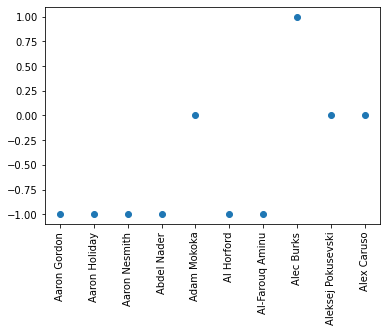

In [24]:
plt.scatter(x = X.index[:10], y = X['cluster'][:10])
plt.xticks(rotation=90)